In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [4]:
weather_data = pd.read_csv("Istanbul Weather Data.csv", parse_dates =["DateTime"], infer_datetime_format = True)

In [5]:
weather_data.head()

,DateTime,Condition,Rain,MaxTemp,MinTemp,SunRise,SunSet,MoonRise,MoonSet,AvgWind,AvgHumidity,AvgPressure
0,2019-07-22,Partly cloudy,0.0,29,23,05:51:00,20:30:00,23:41:00,10:51:00,19,57,1017
1,2019-07-21,Sunny,0.0,28,23,05:50:00,20:31:00,23:16:00,9:53:00,20,59,1018
2,2019-07-20,Partly cloudy,0.0,28,22,05:50:00,20:32:00,22:49:00,8:55:00,24,62,1016
3,2019-07-19,Sunny,0.0,28,23,05:48:00,20:32:00,22:19:00,7:56:00,20,60,1014
4,2019-07-18,Partly cloudy,0.0,27,22,05:47:00,20:33:00,21:47:00,6:57:00,16,56,1010


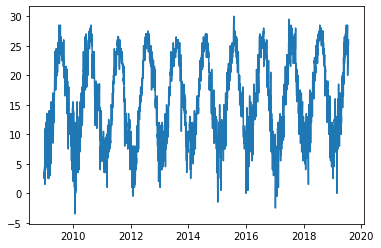

In [8]:
weather_data["AvgTemp"] = (weather_data["MaxTemp"] +weather_data["MinTemp"])/2 
plt.plot(weather_data["DateTime"], weather_data["AvgTemp"])

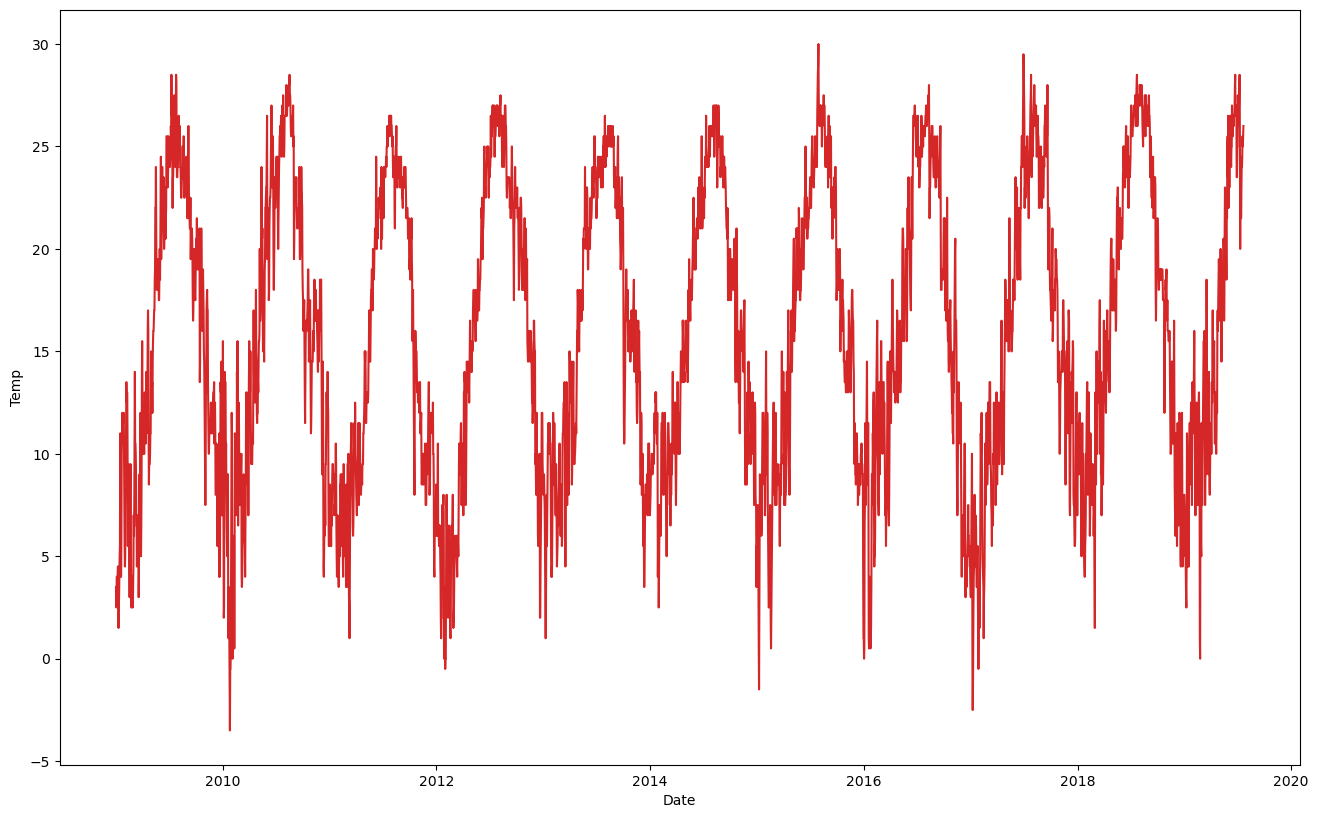

In [11]:
plt.figure(figsize =(16,10), dpi = 100)
plt.plot(weather_data.DateTime,weather_data.AvgTemp, color = "tab:red")
plt.gca().set(xlabel = "Date", ylabel = "Temp")
plt.show()

In [13]:
weather_data.set_index("DateTime", inplace = True)

In [14]:
weather_data.head()

,Condition,Rain,MaxTemp,MinTemp,SunRise,SunSet,MoonRise,MoonSet,AvgWind,AvgHumidity,AvgPressure,AvgTemp
DateTime,,,,,,,,,,,,
2019-07-22,Partly cloudy,0.0,29,23,05:51:00,20:30:00,23:41:00,10:51:00,19,57,1017,26.0
2019-07-21,Sunny,0.0,28,23,05:50:00,20:31:00,23:16:00,9:53:00,20,59,1018,25.5
2019-07-20,Partly cloudy,0.0,28,22,05:50:00,20:32:00,22:49:00,8:55:00,24,62,1016,25.0
2019-07-19,Sunny,0.0,28,23,05:48:00,20:32:00,22:19:00,7:56:00,20,60,1014,25.5
2019-07-18,Partly cloudy,0.0,27,22,05:47:00,20:33:00,21:47:00,6:57:00,16,56,1010,24.5


In [15]:
predicted_df = weather_data["AvgTemp"].to_frame().shift(1).rename(columns = {"AvgTemp":"AvgTempPred"})
actual_df = weather_data["AvgTemp"].to_frame().rename(columns = {"AvgTemp":"AvgTempActual"})
one_step_df = pd.concat([actual_df,predicted_df], axis = 1)
one_step_df = one_step_df[1:]
one_step_df.head(10)

,AvgTempActual,AvgTempPred
DateTime,,
2019-07-21,25.5,26.0
2019-07-20,25.0,25.5
2019-07-19,25.5,25.0
2019-07-18,24.5,25.5
2019-07-17,24.0,24.5
2019-07-16,24.0,24.0
2019-07-15,22.5,24.0
2019-07-14,21.5,22.5
2019-07-13,24.5,21.5


In [17]:
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt

temp_red_err = sqrt(MSE(one_step_df.AvgTempActual,one_step_df.AvgTempPred))
print("The RMSE is",temp_red_err)

The RMSE is 1.6661583271835805


In [19]:
import itertools
p = d = q = range(0,2)

pdq = list(itertools.product(p,d,q))
seasonal_pdq= [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

print("examples parameters combinations for seasonal ARIMA..")
print("SARIMAX : {} x {}".format(pdq[1],seasonal_pdq[1]))
print("SARIMAX : {} x {}".format(pdq[2],seasonal_pdq[2]))
print("SARIMAX : {} x {}".format(pdq[3],seasonal_pdq[3]))
print("SARIMAX : {} x {}".format(pdq[4],seasonal_pdq[4]))

examples parameters combinations for seasonal ARIMA..
SARIMAX : (0, 0, 1) x (0, 0, 1, 12)
SARIMAX : (0, 1, 0) x (0, 1, 0, 12)
SARIMAX : (0, 1, 1) x (0, 1, 1, 12)
SARIMAX : (1, 0, 0) x (1, 0, 0, 12)


In [26]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

for param in pdq:
    for param_seasonal in seasonal_pdq:
       
        mod = sm.tsa.statespace.SARIMAX(one_step_df.AvgTempActual,
                                       order = param,
                                       seasonal_order = param_seasonal,
                                       enforce_stationarity= False,
                                       enforce_invertibility = False)
        results = mod.fit()
        print("SARIMA{}x{}12 - AIC:{}".format(param,param_seasonal,results.aic))
        
    

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:32910.61681622968
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:28807.21004697391
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:20868.28449288904
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:20575.079258674265
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:20820.465030323772
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:20598.078189925625
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:20527.3893169499
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:20523.369828977768
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:27979.050555730246
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:24294.695585852765
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:18147.672615028343
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:17678.49337457316
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:18084.55431512017
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:18133.198734546044
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:17656.884422901
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:17639.858970766007
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:14864.513500580608
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:148

In [28]:
mod  =  sm.tsa.statespace.SARIMAX(one_step_df.AvgTempActual,
                                 order = (1,1,1),
                                 seasonal_order = (1, 0, 1, 12),
                                 enforce_stationarity = False,
                                 enforce_invertibility = False)
results=mod.fit()

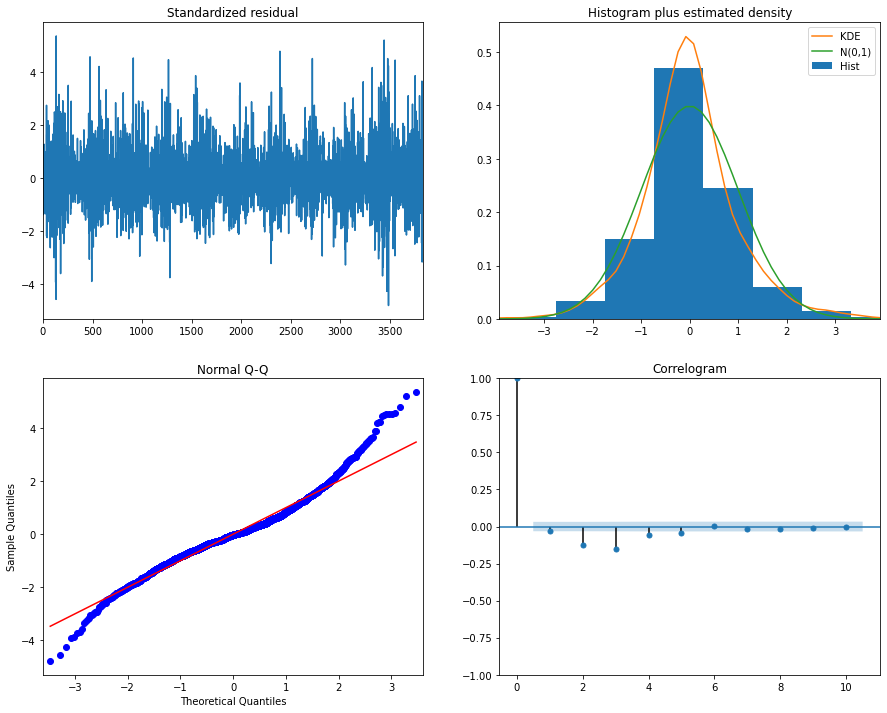

In [31]:
results.plot_diagnostics(figsize=(15,12))
plt.show()

In [55]:
pred = results.get_prediction(start = pd.to_datetime("2013-05-19"),dynamic = False)
pred_ci = pred.conf_int()

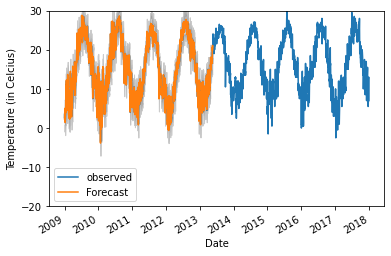

In [57]:
ax = one_step_df.AvgTempActual["2017":].plot(label="observed")
pred.predicted_mean.plot(ax=ax,label = "Forecast")

ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],color="k",alpha = .2)
ax.set_xlabel("Date")
ax.set_ylabel("Temperature (in Celcius)")
plt.ylim([-20,30])
plt.legend()
plt.show()